# King County

In [1]:
%%capture
import sys
!ln -s ../syntheticml syntheticml
!{sys.executable} -m pip install -r ../requirements.txt
!{sys.executable} -m pip install -U kaleido

In [2]:
import pandas as pd
df = pd.read_csv('../datasets/kingcounty/raw/kc_house_data.csv');
df.sample(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19952,3278600900,20141231T000000,443000.0,3,2.5,1780,2778,2.0,0,0,...,8,1530,250,2007,0,98126,47.5487,-122.372,1380,1998
2058,6893300350,20140602T000000,439900.0,2,2.0,1410,12282,1.5,0,0,...,8,1410,0,1909,1988,98024,47.5242,-121.926,1410,8931
19782,3278605570,20140619T000000,362500.0,3,2.5,1800,2700,2.0,0,0,...,8,1800,0,2011,0,98126,47.5458,-122.369,1380,1200


In [3]:
from syntheticml.data.synthetic import Synthetic, MODELS
syn = Synthetic(df, 
        id="id",
        category_columns=("condition", "floors", "grade", "view", "waterfront", "yr_built", "yr_renovated", "zipcode", "bathrooms", "bedrooms",),
        synthetic_folder = "../datasets/kingcounty/synth",
        models=MODELS.keys(),
        n_sample = 21613
)

In [4]:
%%capture
syn.process()

## Metricas
### Continuas

In [5]:
metrics = syn.current_metrics()
metrics[~metrics.is_categorical].dropna(axis=1, how='all')

,name,top5,top5_freq,top5_prob,is_categorical,nobs,missing,mean,std_err,upper_ci,...,mode_freq,median,0.1%,1.0%,5.0%,25.0%,75.0%,95.0%,99.0%,99.9%
0,id,"[795000620, 1000102, 3578401060, 3528000040, 4...","[3, 2, 2, 2, 2]","[0.0001388053486327673, 9.253689908851155e-05,...",False,21613.0,0.0,4.580302e+09,133094.228997,4.580562e+09,...,0.000139,3.904930e+09,1.126143e+07,1.220339e+08,5.124803e+08,2.123049e+09,7.308900e+09,9.297300e+09,9.558728e+09,9.834201e+09
2,price,"[450000.0, 350000.0, 550000.0, 500000.0, 42500...","[172, 172, 159, 152, 150]","[0.007958173321611993, 0.007958173321611993, 0...",False,21613.0,0.0,5.400881e+05,16.986406,5.401214e+05,...,0.007958,4.500000e+05,9.500000e+04,1.535004e+05,2.100000e+05,3.219500e+05,6.450000e+05,1.156480e+06,1.964400e+06,3.476302e+06
5,sqft_living,"[1300, 1400, 1440, 1660, 1010]","[138, 135, 133, 129, 129]","[0.0063850460371072965, 0.006246240688474529, ...",False,21613.0,0.0,2.079900e+03,0.042495,2.079983e+03,...,0.006385,1.910000e+03,5.200000e+02,7.200000e+02,9.400000e+02,1.427000e+03,2.550000e+03,3.760000e+03,4.978800e+03,7.289400e+03
6,sqft_lot,"[5000, 6000, 4000, 7200, 4800]","[358, 290, 251, 220, 120]","[0.016564104936843568, 0.013417850367834173, 0...",False,21613.0,0.0,1.510697e+04,1.916463,1.511072e+04,...,0.016564,7.618000e+03,7.110000e+02,1.013120e+03,1.800000e+03,5.040000e+03,1.068800e+04,4.333920e+04,2.130080e+05,4.958764e+05
12,sqft_above,"[1300, 1010, 1200, 1220, 1140]","[212, 210, 206, 192, 184]","[0.009808911303382224, 0.009716374404293713, 0...",False,21613.0,0.0,1.788391e+03,0.038314,1.788466e+03,...,0.009809,1.560000e+03,5.122400e+02,7.000000e+02,8.500000e+02,1.190000e+03,2.210000e+03,3.400000e+03,4.370000e+03,6.113880e+03
13,sqft_basement,"[0, 600, 700, 500, 800]","[13126, 221, 218, 214, 206]","[0.6073196687179012, 0.010225327349280526, 0.0...",False,21613.0,0.0,2.915090e+02,0.020477,2.915492e+02,...,0.607320,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e+02,1.190000e+03,1.660000e+03,2.371640e+03
17,lat,"[47.6624, 47.6846, 47.5322, 47.5491, 47.6711]","[17, 17, 17, 17, 16]","[0.0007865636422523481, 0.0007865636422523481,...",False,21613.0,0.0,4.756005e+01,0.000006,4.756007e+01,...,0.000787,4.757180e+01,4.719191e+01,4.725687e+01,4.731030e+01,4.747100e+01,4.767800e+01,4.774964e+01,4.777269e+01,4.777670e+01
18,long,"[-122.29, -122.3, -122.362, -122.291, -122.363]","[116, 111, 104, 100, 99]","[0.005367140147133669, 0.005135797899412391, 0...",False,21613.0,0.0,-1.222139e+02,0.000007,-1.222139e+02,...,0.005367,-1.222300e+02,-1.224929e+02,-1.224080e+02,-1.223870e+02,-1.223280e+02,-1.221250e+02,-1.219790e+02,-1.217830e+02,-1.216980e+02
19,sqft_living15,"[1540, 1440, 1560, 1500, 1460]","[197, 195, 192, 181, 169]","[0.009114884560218387, 0.009022347661129875, 0...",False,21613.0,0.0,1.986552e+03,0.031712,1.986615e+03,...,0.009115,1.840000e+03,7.461200e+02,9.500000e+02,1.140000e+03,1.490000e+03,2.360000e+03,3.300000e+03,4.080000e+03,5.011640e+03
20,sqft_lot15,"[5000, 4000, 6000, 7200, 4800]","[427, 357, 289, 211, 145]","[0.019756627955397215, 0.01651783648729931, 0....",False,21613.0,0.0,1.276846e+04,1.263322,1.277093e+04,...,0.019757,7.620000e+03,8.860000e+02,1.191240e+03,1.999200e+03,5.100000e+03,1.008300e+04,3.706280e+04,1.576870e+05,3.029932e+05


### Categoricas

In [6]:
metrics[metrics.is_categorical].dropna(axis=1, how='all')

,name,top5,top5_freq,top5_prob,is_categorical,nobs,missing
1,date,"[20140623T000000, 20140625T000000, 20140626T00...","[142, 131, 131, 127, 126]","[0.006570119835284319, 0.0060611668902975065, ...",True,21613.0,0.0
3,bedrooms,"[3, 4, 2, 5, 6]","[9824, 6882, 2760, 1601, 272]","[0.4545412483227687, 0.3184194697635682, 0.127...",True,21613.0,0.0
4,bathrooms,"[2.5, 1.0, 1.75, 2.25, 2.0]","[5380, 3852, 3048, 2047, 1930]","[0.24892425854809605, 0.17822606764447324, 0.1...",True,21613.0,0.0
7,floors,"[1.0, 2.0, 1.5, 3.0, 2.5]","[10680, 8241, 1910, 613, 161]","[0.4941470411326516, 0.38129829269421184, 0.08...",True,21613.0,0.0
8,waterfront,"[0, 1]","[21450, 163]","[0.9924582427242863, 0.007541757275713691]",True,21613.0,0.0
9,view,"[0, 2, 3, 1, 4]","[19489, 963, 510, 332, 319]","[0.9017258131680007, 0.04455651691111831, 0.02...",True,21613.0,0.0
10,condition,"[3, 4, 5, 2, 1]","[14031, 5679, 1701, 172, 30]","[0.6491926155554527, 0.26275852496182855, 0.07...",True,21613.0,0.0
11,grade,"[7, 8, 9, 6, 10]","[8981, 6068, 2615, 2038, 1134]","[0.41553694535696106, 0.280756951834544, 0.120...",True,21613.0,0.0
14,yr_built,"[2014, 2006, 2005, 2004, 2003]","[559, 454, 450, 433, 422]","[0.025864063295238975, 0.02100587609309212, 0....",True,21613.0,0.0
15,yr_renovated,"[0, 2014, 2013, 2003, 2007]","[20699, 91, 37, 36, 35]","[0.9577106371165502, 0.0042104289085272755, 0....",True,21613.0,0.0


## Scores

In [7]:
syn.scores[syn.scores.type == "avg"]

,name,type,score
0,copulagan,avg,0.785472
3,tvae,avg,0.783617
6,gaussiancopula,avg,0.734722
9,ctgan,avg,0.776413


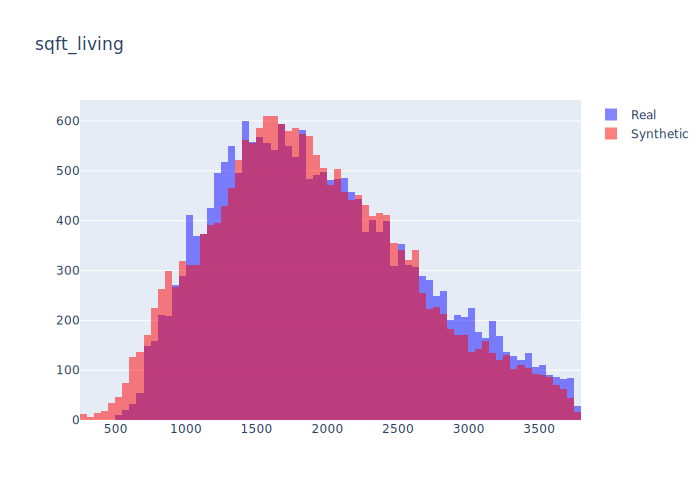

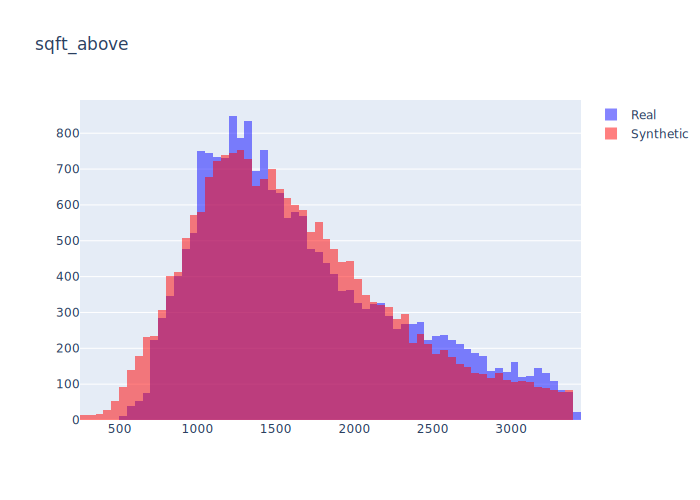

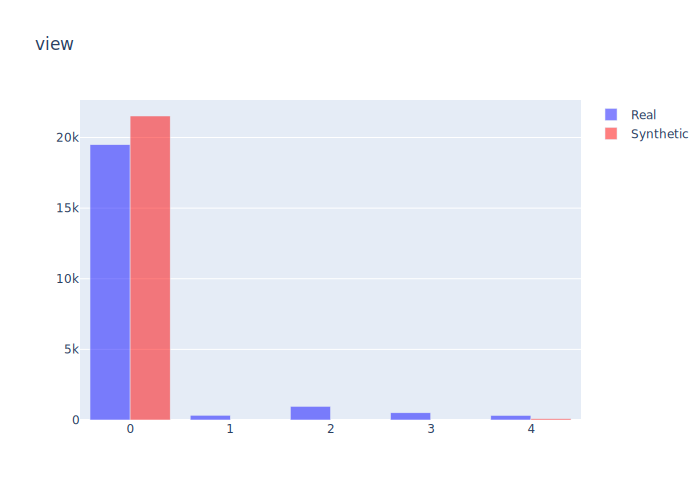

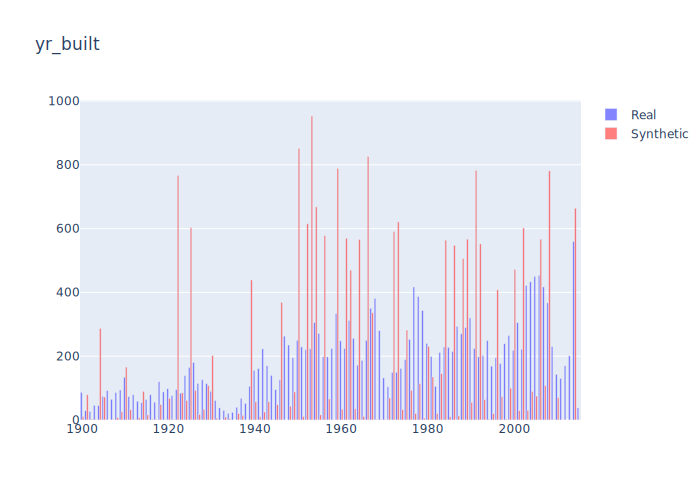

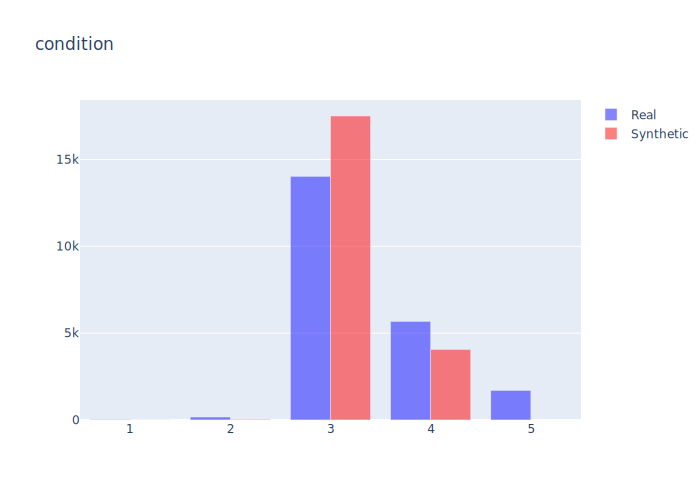

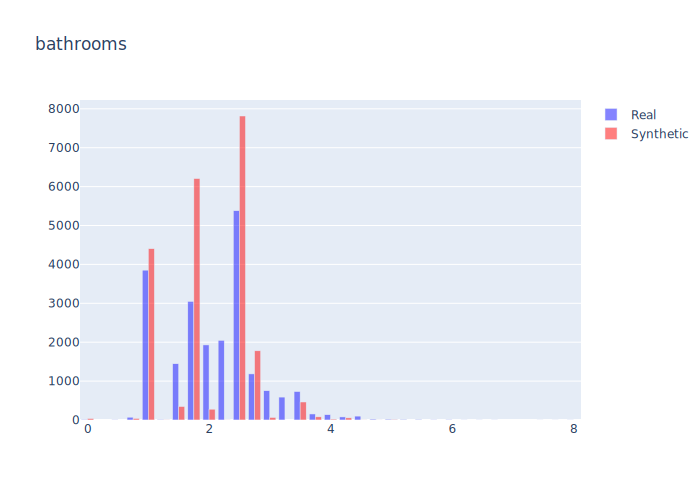

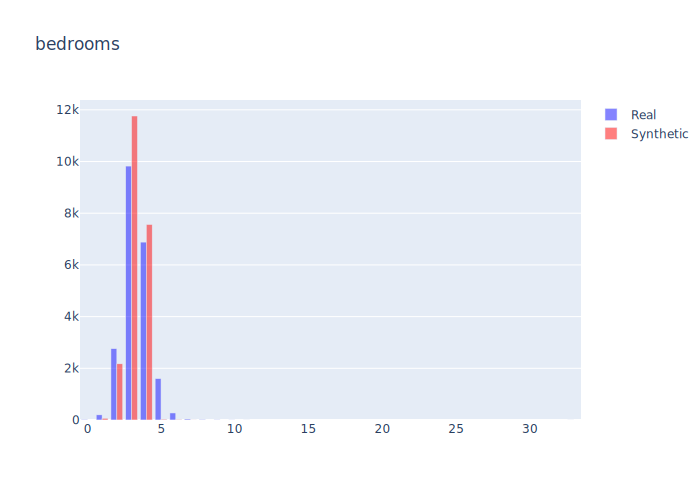

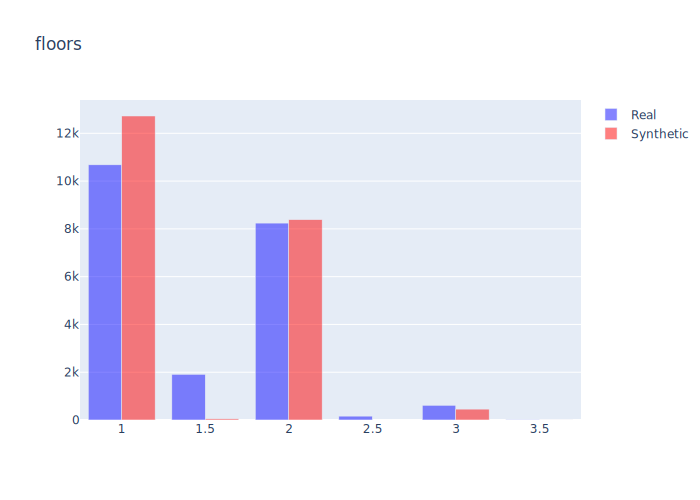

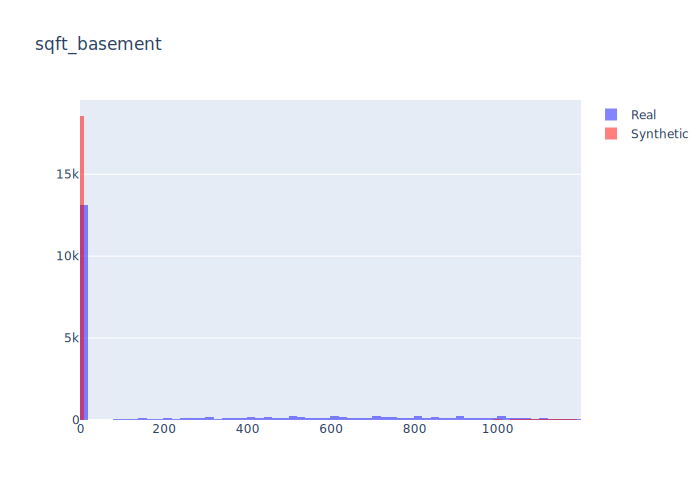

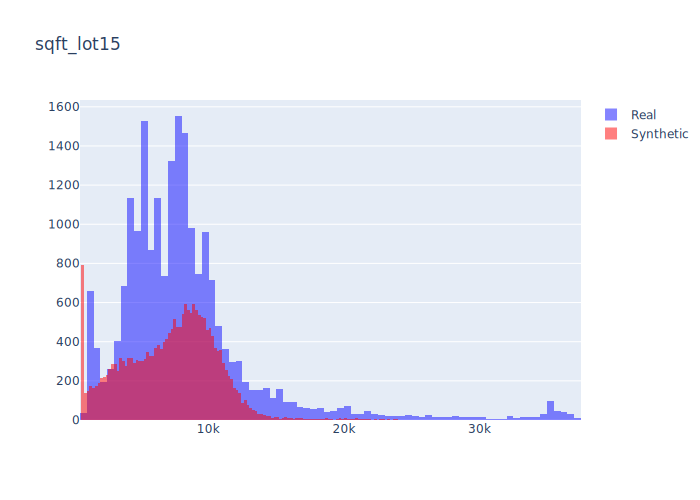

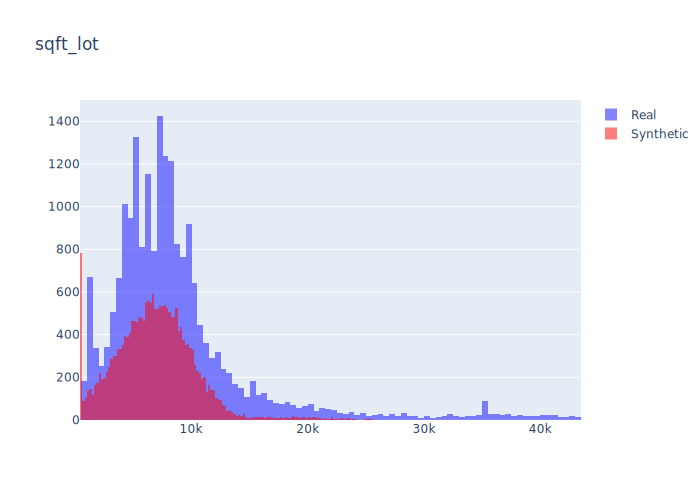

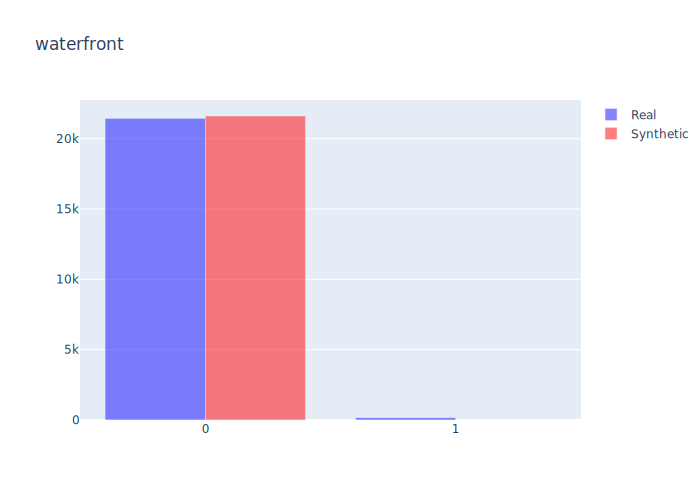

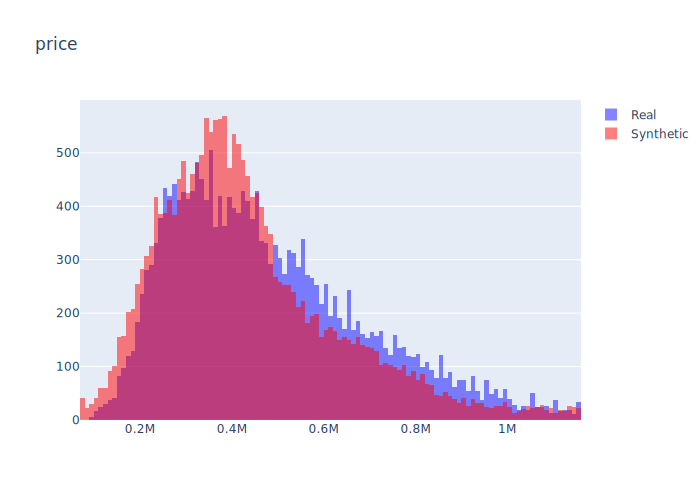

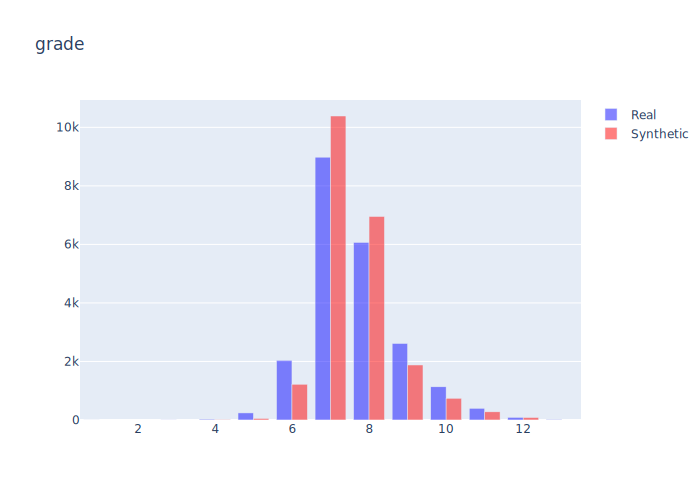

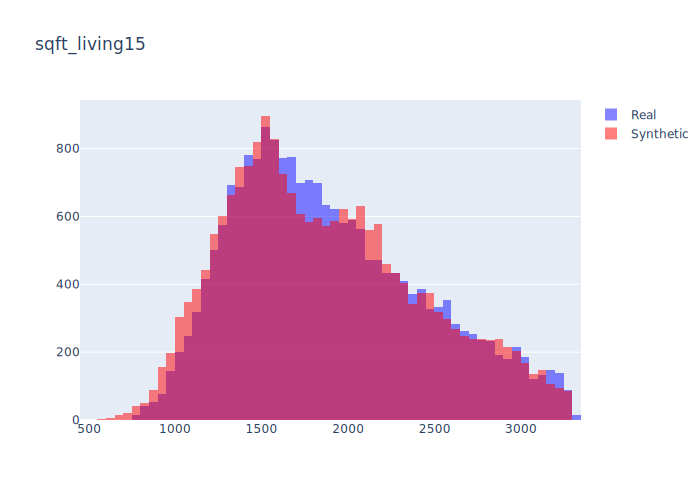

In [8]:
from syntheticml.data.charts import Charts
for fig in syn.get_charts("tvae", {'date', 'id', 'zipcode', 'lat', 'long', 'yr_renovated'}):
    if fig:
        fig.show("svg")

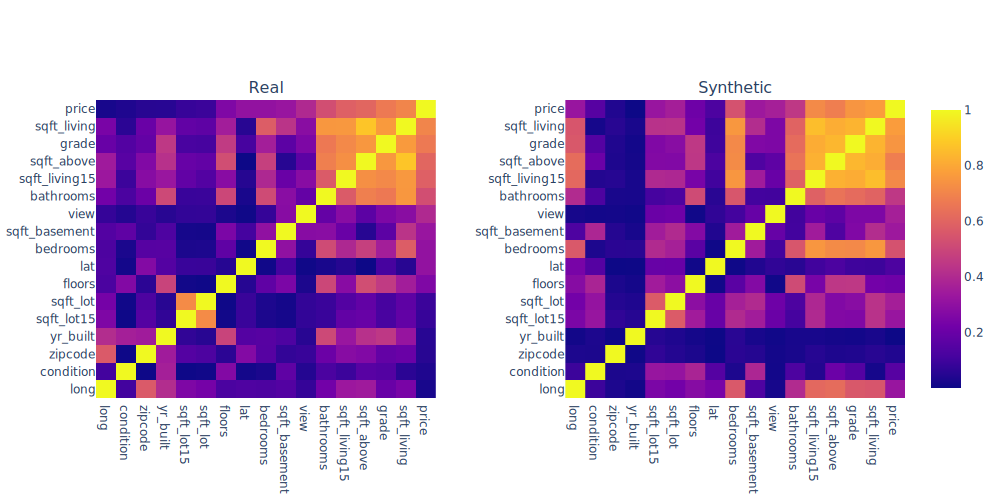

In [11]:
syn.charts.pair_corr(syn.df, syn.synths['tvae'], {'id', 'waterfront', 'yr_renovated'}).update_layout(dict(width=1000)).show("svg")